<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/Joao_Siqueira_Portifolio/blob/master/Rio_Violence_EDA_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Step-by-step Exploratory Data Analysis using Pandas Library

Rio de Janeiro, Brazil, is certainly one of the most beautiful cities in the world, as well as one of the most visited. Its people are so nice and welcoming. I've already experienced a sunset in Barra da Tijuca beach and I can say that the good energy at that beach was something very special. What an amazing city! 

Rio de Janeiro, however, faces every day another reality: violence. Everybody knows it exists in Rio. But, how bad is this violence? Is it so bad or just the media exaggerating in violence coverage? Let's take a look at the data available at the Rio Police database. This exploratory data analysis (EDA) proves that by using only Pandas library much can be done. Of course by using other libraries, such as Matplotlib or Seaborn, the data vizualization can become much better. However, for a fast first analyzis, Pandas can provide a really good visual understanding of your dataset. Hope you like this analysis.

## Data Acquisition


The data in this analysis is from the **Secretaria de Segurança Pública do estado do Rio de Janeiro**. This analysis considers different crimes and locations in Rio de Janeiro state from 1991 until 2019. 

### Importing the data

Let's first import the data.

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## First analysis

The first step in this analysis is to take a first look at this data frame and be familiar with it. Let's do it. 



Before anything else, let's see how big the dataset is. It can be done by displaying the dataset property "shape".

In [2]:
# Number of variables (columns) and inputs (rows).

print("Variables:  {}".format(df.shape[1]))
print("Inputs:  {}".format(df.shape[0]))


Variables:  56
Inputs:  344


Now that we know the dimensios of the dataset, it would be a good idea to know what are the variables presented in it. Let's do it. These variables are related to the crimes that occur in Rio and they are, of course, in portuguese. 

In [3]:
print(df.columns)

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Onother important step in this analysis, and that will certainly help us when cleaning the data, is knowing what are the types of each variable. 

In [4]:
#Type of each variable

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

It is possible to see that the dataset variables are not from the same type - `int` and `float`.

Ok ... We have already advanced quite a bit in our EDA. Now let's take a look at our dataset and really see how it is structured. We can do it by using the method `.head()` and `.tail()`.

In [5]:
# Seeing the first 5 columns of the dataframe

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [6]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Intriguingly, some variables have a lot of missing data. Given the long time interval presented in the dataset, we can suggest some hypotheses of what could explain this absence, and how we can get around it to continue exploring the data set.

* The recorded data is quite old (since 1991), and these crimes may not have been recorded. The data absence does not mean that the crime did not happen. There are some ways to deal with these absent data though. We'll see it soon. 

* Unfortunately today in Brazil, data is not considered as it should. Imagine now 30 years ago! We must also take into account the format in which these data were recorded at the time. Were they correctly recorded and lost during scanning periods? Or has the documentation of this information always been careless?

Before we decide what to do about the missing data, let's check the ratio of them to the entire dataset.

In [7]:
# Knowing the percentage of absent values of each variable in

(df.isnull().sum()/df.shape[0])*100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


Above, it possible to see that some of the variables have missing values ​​in considerable proportions such as the example of crimes related to bicycles and drug dealing.

As the data are structured over time, a way to carry out an analysis that is better suited to reality is to analyze the data from the date they started to be recorded.

Besides, there are other ways of looking at and exploring data, such as:

* Annual crime figures.
* Monthly numbers per crime.
* Crime categories (against life, against heritage, etc.)

## Statistic information of violence in Rio de Janeiro

It's time to check some statistics of this data frame. 
The dataset used in this EDA presents many kinds of crimes that are divided into two cathegories: crimes against the property and against the person. We are going to explore an example of each cathegory here. Let's see what information we can obtain from these EDA. 


Pandas library features a handy method that displays some very important statistics parameters. Let's use it! 

In [8]:
# Summary of the data frame statistics

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

The first crime in this dataset is murder (related to *hom_doloso*). The average number of murder is 504.5 per month and maximum number recorder is 831. Other statistics can be obtained as it can be seen. 

### Crimes against property

In this part of the project let's focus on car robbery (*roubo_veiculo*) and car stealing (*furto_veiculo*) statistics. 
That's a common problem in large cities in Brazil. Since we have data from robbery, stealing, vehicle recovery it is possible to obtain relevant information whether the police have been able to combat this kind of crime. Let's find the average number of these crimes and vehicle recovery by using the method .`mean()`.

In [9]:
# Mean of some important variables

print("The mean value of vehicle roberry is {} vehicles every month.\n".format(int(df["roubo_veiculo"].mean(),)))



print("The mean value of vehicle stealing is {} vehicles every month.\n".format(int(df["furto_veiculos"].mean())))



print("The mean value of recovered vehicles is {} vehicles every month.".format(int(df["recuperacao_veiculos"].mean())))

The mean value of vehicle roberry is 2448 vehicles every month.

The mean value of vehicle stealing is 1674 vehicles every month.

The mean value of recovered vehicles is 1772 vehicles every month.


In [10]:
# Calculating the percentage of recovered vehicles in comparison to stolen and robbed vehicles

print("The percentage of recovered vehicles is {:.2f}%.".format((df.recuperacao_veiculos.sum()/(df.roubo_veiculo.sum()+df.furto_veiculos.sum()))*100))

The percentage of recovered vehicles is 42.98%.


Let's calculate the maximum and minimum number of robbed vehicles and when these events happened.

In [11]:
df.loc[df.roubo_veiculo == df.roubo_veiculo.max()]



,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
326,2018,3,508,6.0,20,109.0,553,5473,452.0,171.0,2308.0,638,115,5358,918,7638,1385,2,5.0,2183.0,9.0,52.0,8.0,2729,21040,1249,1623,743.0,1224.0,150.0,6557,11546,0.0,136.0,4.0,2654.0,1744,673.0,950.0,152.0,3450,2795.0,577.0,1347.0,109.0,4962.0,428.0,33,1.0,4.0,0.0,643,11206,5358,66035.0,3


In [32]:
print("The maximum number of robbed vehicles in a month is {}.".format(int(df.iloc[326].roubo_veiculo)))

The maximum number of robbed vehicles in a month is 5358.


In [13]:
df.loc[df.roubo_veiculo == df.roubo_veiculo.min()]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3


In [14]:
print("The minimum number of robbed vehicles is {}.".format(int(df.iloc[1].roubo_veiculo)))

The minimum number of robbed vehicles is 1097.


This last analysis show that the maximum number of robbed vehicles is twice as higher as the mean value along these years. It happened in march, 2018. The same happens for the minimum number of cases: twice as lower as the mean value. However, this minimum number of robbed vehicles happened in the beginning of 1991 and therefore, as this EDA indicated before, the data in this period may not have been well registered. This last conclusion is not trustful.

So, let's use this Pandas method - `nlargest` - and see if we can find a more trustful information. 

In [15]:
# Finding the 5 minimum numbers of robbed vehicles

df.roubo_veiculo.nsmallest(50)

1      1097
0      1174
2      1265
68     1312
7      1347
71     1350
8      1353
5      1354
73     1360
6      1365
69     1394
70     1412
238    1413
3      1415
245    1439
72     1442
4      1449
244    1462
9      1470
67     1479
239    1480
83     1482
236    1489
241    1490
243    1491
65     1506
66     1507
59     1509
242    1544
61     1555
235    1558
11     1563
240    1567
60     1569
85     1582
237    1590
250    1595
10     1600
246    1604
89     1609
251    1615
248    1629
252    1630
74     1634
77     1641
247    1642
232    1648
64     1652
234    1666
79     1667
Name: roubo_veiculo, dtype: int64

In [16]:
df.iloc[238]

vano                           2010.0
mes                              11.0
hom_doloso                      364.0
lesao_corp_morte                  1.0
latrocinio                        7.0
hom_por_interv_policial         102.0
tentat_hom                      368.0
lesao_corp_dolosa              6606.0
estupro                         442.0
hom_culposo                     182.0
lesao_corp_culposa             3291.0
roubo_comercio                  338.0
roubo_residencia                107.0
roubo_veiculo                  1413.0
roubo_carga                     266.0
roubo_transeunte               4925.0
roubo_em_coletivo               646.0
roubo_banco                       1.0
roubo_cx_eletronico               3.0
roubo_celular                   518.0
roubo_conducao_saque              6.0
roubo_apos_saque                138.0
roubo_bicicleta                   NaN
outros_roubos                   801.0
total_roubos                   9162.0
furto_veiculos                 1318.0
furto_transe

Well ... This last analysis pointed out that november 2010 as a good option to consider the minimum-number-of-robbed-vehicles month. It presents 1413 robbed vehicles.

Let's see the distribution of this last variable along this decade then ... Let's plot it!


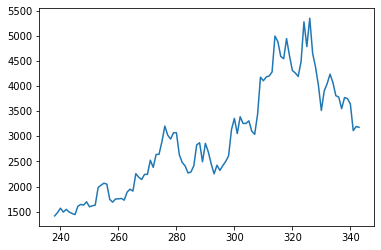

In [17]:
# plotting the number of robbed vehicles along the last decade

df.roubo_veiculo[238:].plot();

This simple analysis show that the vehicle robbery increases quite a lot along this last decade.

Let's do the same for vehicle recovery.

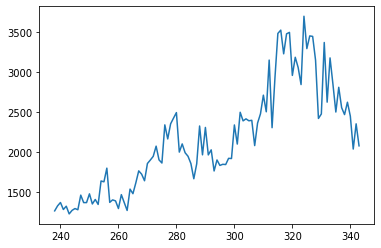

In [18]:
df.recuperacao_veiculos[238:].plot();

Results show that the vehicle-recovery increase is proportional to the increase in vehicle robbery. It clearly shows that the police has been able to combat this kind of crime.

### Crimes against the person

Murder, aggraveted assault, forcible sex offenses, non-forcible sex offenses, kidnapping, simple assault and intimidation, battery, domestic violence ... The term “crimes against the person” refers to a broad array of criminal offenses which usually involve bodily harm, the threat of bodily harm, or other actions committed against the will of an individual. 

In this section, let's explore the number of murders in Rio de Janeiro. 



In [19]:
# Knowing the maximum value of murders

print("The maximum number of murders is {}.\n".format(df.hom_doloso.max()))

df.loc[df["hom_doloso"]==831]



The maximum number of murders is 831.



,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [20]:
# Knowing the manimum and minimum value of murders

print("The minimum number of murders is {}.\n".format(df.hom_doloso.min()))

df.loc[df["hom_doloso"]==272]


The minimum number of murders is 272.



,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [21]:
# Knowing the mean of murders per month

round(df.hom_doloso.mean(),1)

504.6

This first analysis shows that the murders vary quite a lot ... Let's see how this variable really varies. Let's plot a histogram to do so ... 

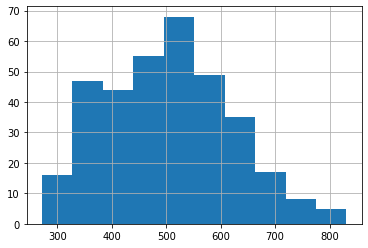

In [22]:
# Plotting a histogram graph of murders

df.hom_doloso.hist();

The graph above gives some important information, such as:

* Almost 70 months present a number of 500 to 550 of murders per month in the considered period of this EDA. 

* Less than 10 months only present number of murders around 800.  

* Less than 20 months present less than 300 murders per month.


In [23]:
# Months of maximum number of murders.

df.loc[df.hom_doloso > 800]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
47,1994,12,826,NaN,21,NaN,196,3550,NaN,NaN,NaN,293,165,2012,189,1045,406,42,NaN,NaN,NaN,NaN,NaN,159,4311,1679,571,NaN,NaN,NaN,2712,4962,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,1480,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,847,1451,2012,NaN,3
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3
49,1995,2,814,NaN,16,NaN,179,3286,NaN,NaN,NaN,294,144,1876,118,981,350,32,NaN,NaN,NaN,NaN,NaN,152,3947,1737,465,NaN,NaN,NaN,2519,4721,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,1293,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,830,1331,1876,NaN,3


In [24]:
# Months of minimum number of murders.

df.loc[df.hom_doloso < 300]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
258,2012,7,298,5.0,15,49.0,329,7346,540.0,227.0,4164.0,481,98,1688,265,4163,377,2,1.0,407.0,8.0,141.0,NaN,830,8461,1331,2476,856.0,1560.0,NaN,8429,14652,2.0,196.0,14.0,3245.0,1678,664.0,815.0,235.0,1408,2311.0,589.0,1451.0,43.0,6900.0,524.0,38,2.0,2.0,0.0,367,4947,1688,61308.0,3
259,2012,8,294,1.0,11,44.0,349,7328,515.0,220.0,4221.0,422,100,1751,328,4041,345,2,3.0,371.0,7.0,167.0,NaN,919,8456,1309,2552,888.0,1647.0,NaN,8332,14728,2.0,140.0,7.0,3248.0,1644,665.0,813.0,206.0,1395,2361.0,627.0,1515.0,53.0,7025.0,517.0,51,1.0,0.0,0.0,350,4757,1751,60926.0,3
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


At last, let's plot the distribution of murders along the years.

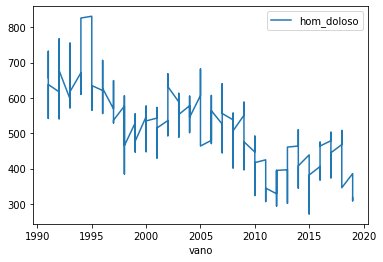

In [25]:
# Line plots
df.plot("vano","hom_doloso", kind = "line");


## Conclusion

The dataset used in this EDA has many variables and gives us many possibilities. In this short analysis, only two types of crimes were analyzed: vehicle robbery and murder. 

At first, it was realized that data in the beginning of 90's was not truthful once it presented many absent values. So, for the analysis on vehicle robbery it was considered data from last decade only. This analysis shows that number of robbed vehicles varies quite a lot depending on the month - around 5000 and 1000 as maximum and minumim number of robbed vehicles per month respectivelly. Analsysis also showed that 42% of the robbed vehicles are recovered. Yet the number of vehicle robbery increases along the last decade. The same happens to the number of recovered vehicles. It indicates that the police has been able to combat this type of crime. Regarding the number of murders, a mean of 504 murders happen every month. A different behavior from the vehicle robbery happens here: the number of murders has been decreasing since the beggining of the 90's. The maximum number of this crime is 831 in the year of 1995 and minimum number is 272 murders which happened in 2015.

At last, that EDA was a great exercise to see how simple this analysis can give us so much information using only simple commands of Pandas library. It showed us that Rio de Janeiro has really faced a cruel reality along the last 30 years. The police, however, apparently has been able to fight back the crime in the city. That's only some information and much more could be taken from this dataset.